### Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [3]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
display('Sample records from the train dataset:', train.head())
display('Sample records from the test dataset:', test.head())

'Sample records from the train dataset:'

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


'Sample records from the test dataset:'

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


In [4]:
display('Summary stats for train dataset:', train.describe(include = 'all').T)
display('Summary stats for test dataset:', test.describe(include = 'all').T)

'Summary stats for train dataset:'

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,913000,1826,2015-03-09,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store,913000,NaN,NaN,NaN,5.5,2.87228,1,3,5.5,8,10
item,913000,NaN,NaN,NaN,25.5,14.4309,1,13,25.5,38,50
sales,913000,NaN,NaN,NaN,52.2503,28.8011,0,30,47,70,231


'Summary stats for test dataset:'

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,45000,NaN,NaN,NaN,22499.5,12990.5,0,11249.8,22499.5,33749.2,44999
date,45000,90,2018-03-22,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store,45000,NaN,NaN,NaN,5.5,2.87231,1,3,5.5,8,10
item,45000,NaN,NaN,NaN,25.5,14.431,1,13,25.5,38,50


In [5]:
display('Count of missing data in train dataset:\n', train.isna().sum())
display('Count of missing data in test dataset:\n', test.isna().sum())

'Count of missing data in train dataset:\n'

date     0
store    0
item     0
sales    0
dtype: int64

'Count of missing data in test dataset:\n'

id       0
date     0
store    0
item     0
dtype: int64

In [6]:
display('Cross-tabulating stores and items in the train dataset:', pd.crosstab(train.item, train.store))
display('Cross-tabulating stores and items in the test dataset:', pd.crosstab(test.item, test.store))

'Cross-tabulating stores and items in the train dataset:'

store,1,2,3,4,5,6,7,8,9,10
item,,,,,,,,,,
1,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826
2,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826
3,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826
4,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826
5,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826
6,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826
7,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826
8,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826
9,1826,1826,1826,1826,1826,1826,1826,1826,1826,1826


'Cross-tabulating stores and items in the test dataset:'

store,1,2,3,4,5,6,7,8,9,10
item,,,,,,,,,,
1,90,90,90,90,90,90,90,90,90,90
2,90,90,90,90,90,90,90,90,90,90
3,90,90,90,90,90,90,90,90,90,90
4,90,90,90,90,90,90,90,90,90,90
5,90,90,90,90,90,90,90,90,90,90
6,90,90,90,90,90,90,90,90,90,90
7,90,90,90,90,90,90,90,90,90,90
8,90,90,90,90,90,90,90,90,90,90
9,90,90,90,90,90,90,90,90,90,90


#### Frequency Plots for Daily Sales over Time Period

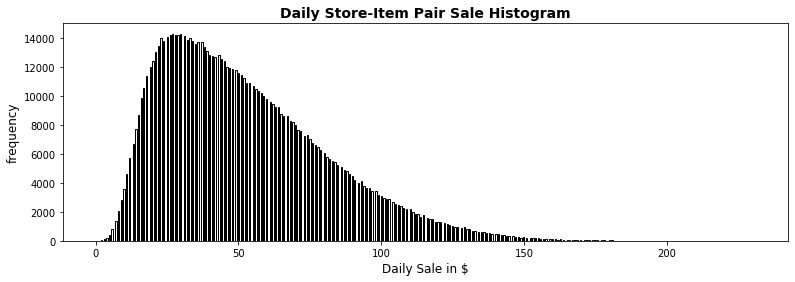

The daily sale across all store-item pairs ranges from 0 to 231.
The mean daily sale for a store-item pair is 52, the median is 47 and the standard deviation is 28.



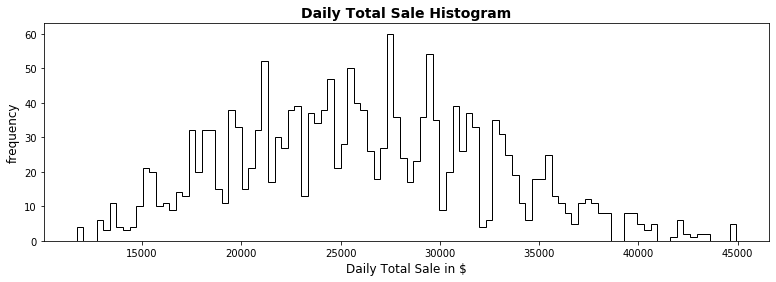

The daily total sale ranges from 11709 to 44936
The mean daily total sale is 26125, the median is 25839 and the standard deviation is 6418.



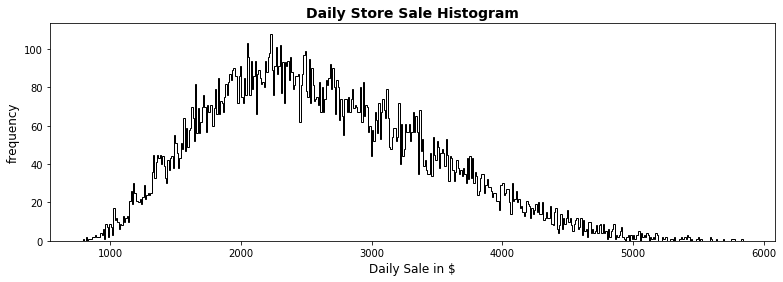

The daily sale in a store ranges from 790 to 5839
The mean daily sale in a store is 2612, the median is 2515 and the standard deviation is 833.



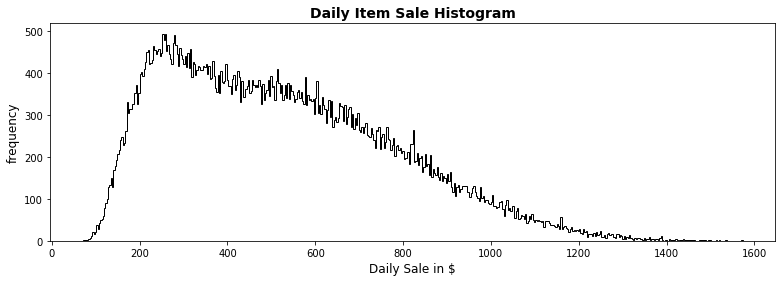

The daily sale of an item ranges from 71 to 1573
The mean daily sale for an item is 522, the median is 489 and the standard deviation is 255.



In [269]:
plt.figure(figsize = (13, 4))
plt.hist(train.sales, histtype = 'step', bins = 500, color = 'black')
plt.xlabel('Daily Sale in $', fontsize = 12)
plt.ylabel('frequency', fontsize = 12)
plt.title('Daily Store-Item Pair Sale Histogram', fontsize = 14, fontweight = 'bold')
plt.show()

print('The daily sale across all store-item pairs ranges from %i to %i.' 
      % (np.min(train.sales), np.max(train.sales)))
print('The mean daily sale for a store-item pair is %i, the median is %i and the standard deviation is %i.\n' 
      % (np.mean(train.sales), np.median(train.sales), np.std(train.sales)))

plt.figure(figsize = (13, 4))

foo = train.groupby(by = ['date'])['sales'].sum()
plt.hist(foo, histtype = 'step', bins = 100, color = 'black')
plt.xlabel('Daily Total Sale in $', fontsize = 12)
plt.ylabel('frequency', fontsize = 12)
plt.title('Daily Total Sale Histogram', fontsize = 14, fontweight = 'bold')
plt.show()

print('The daily total sale ranges from %i to %i' % (foo.min(), foo.max()))
print('The mean daily total sale is %i, the median is %i and the standard deviation is %.i.\n' 
      % (foo.mean(), foo.median(), foo.std()))

plt.figure(figsize = (13, 4))

foo = train.groupby(by = ['store', 'date'])['sales'].sum()
plt.hist(foo, histtype = 'step', bins = 500, color = 'black')
plt.xlabel('Daily Sale in $', fontsize = 12)
plt.ylabel('frequency', fontsize = 12)
plt.title('Daily Store Sale Histogram', fontsize = 14, fontweight = 'bold')
plt.show()

print('The daily sale in a store ranges from %i to %i' % (foo.min(), foo.max()))
print('The mean daily sale in a store is %i, the median is %i and the standard deviation is %.i.\n' 
      % (foo.mean(), foo.median(), foo.std()))

plt.figure(figsize = (13, 4))

foo = (train.groupby(by = ['item', 'date'])['sales'].sum())
plt.hist(foo, histtype = 'step', bins = 500, color = 'black')
plt.xlabel('Daily Sale in $', fontsize = 12)
plt.ylabel('frequency', fontsize = 12)
plt.title('Daily Item Sale Histogram', fontsize = 14, fontweight = 'bold')
plt.show()

print('The daily sale of an item ranges from %i to %i' % (foo.min(), foo.max()))
print('The mean daily sale for an item is %i, the median is %i and the standard deviation is %.i.\n' 
      % (foo.mean(), foo.median(), foo.std()))

#### Observations
<ol>
    <li>The <i>train</i> dataset has 913,000 records for 10 stores. For each store there might be upto 50 items sold.
    <li>The <i>test</i> dataset has 45,000 records for 10 stores. For each store there might be upto 50 items sold.
    <li>There is no missing data in either train or test dataset.
    <li>The data fields must be appropriately typecasted.
    <ul>
        <li>date field to <i>type datetime</i>
        <li>store field to <i>type category</i>
        <li>item field to <i>type category</i>
    </ul>
    <li>There are the same number of records for every store-item pair in the train (1826 per pair) and test (90 per pair) datasets.
    <li>The per day sales plot for store-item pairs, total sales, stores and items are all right skewed. The per day plot for total sales and stores sales have the least skew and the least relative standard deviation (std. dev/mean).
</ol>

#### Typecasting the data fields

In [157]:
train.date = pd.to_datetime(train.date, format = '%Y-%m-%d')
test.date = pd.to_datetime(test.date, format = '%Y-%m-%d')

train.store = train.store.astype('category')
test.store = test.store.astype('category')

train.item = train.item.astype('category')
test.item = test.item.astype('category')

#### Timeseries Plots for Daily Sales over Time Period

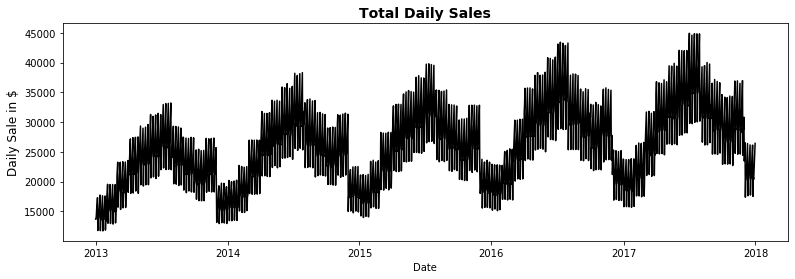

In [236]:
fig, ax = plt.subplots(figsize = (13, 4))

foo = train.groupby('date')['sales'].sum()
ax.plot(foo.index, foo, color = 'black')
ax.set_title('Total Daily Sales', fontdict = {'fontsize' : 14, 'fontweight' : 'bold'})
ax.set_ylabel('Daily Sale in $', fontdict = {'fontsize' : 12})
ax.set_xlabel('Date')

plt.show()


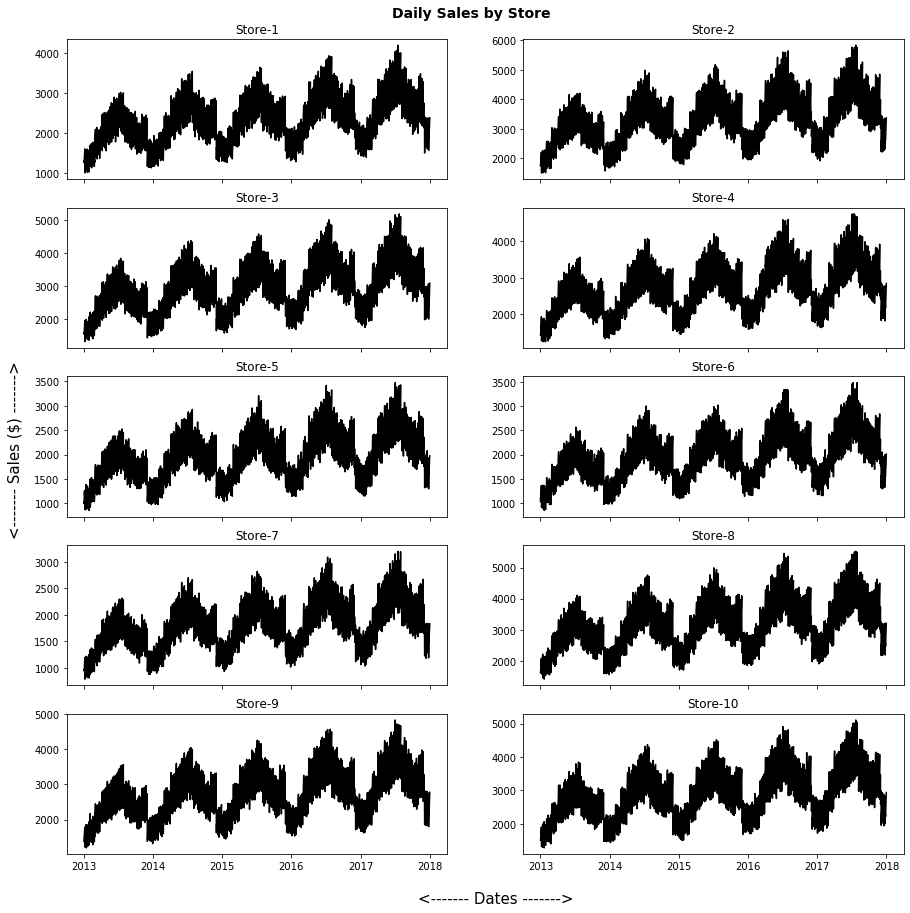

In [240]:
n_stores = len(train.store.unique())

# Setting up parameters for the plot
n_cols = 2
n_rows = np.int(np.ceil(n_stores/n_cols))
store_id = 1

fig, ax = plt.subplots(nrows = n_rows, ncols = n_cols, figsize = (15, 15), sharex = 'col')
plt.suptitle('Daily Sales by Store', x = 0.5, y = 0.91, size = 14, weight = 'bold')
for r in range(n_rows):
    for c in range(n_cols):
        foo = train.query('store == @store_id').groupby('date')['sales'].sum()
        ax[r, c].plot(foo.index, foo, color = 'black')
        ax[r, c].set_title('Store-%i' % store_id, fontdict = {'fontsize' : 12})
        store_id += 1

fig.text(0.07, 0.5, '<------- Sales ($) ------->', rotation = 'vertical', va = 'center', size = 15)
fig.text(0.45, 0.08, '<------- Dates ------->', size = 15)
plt.show()

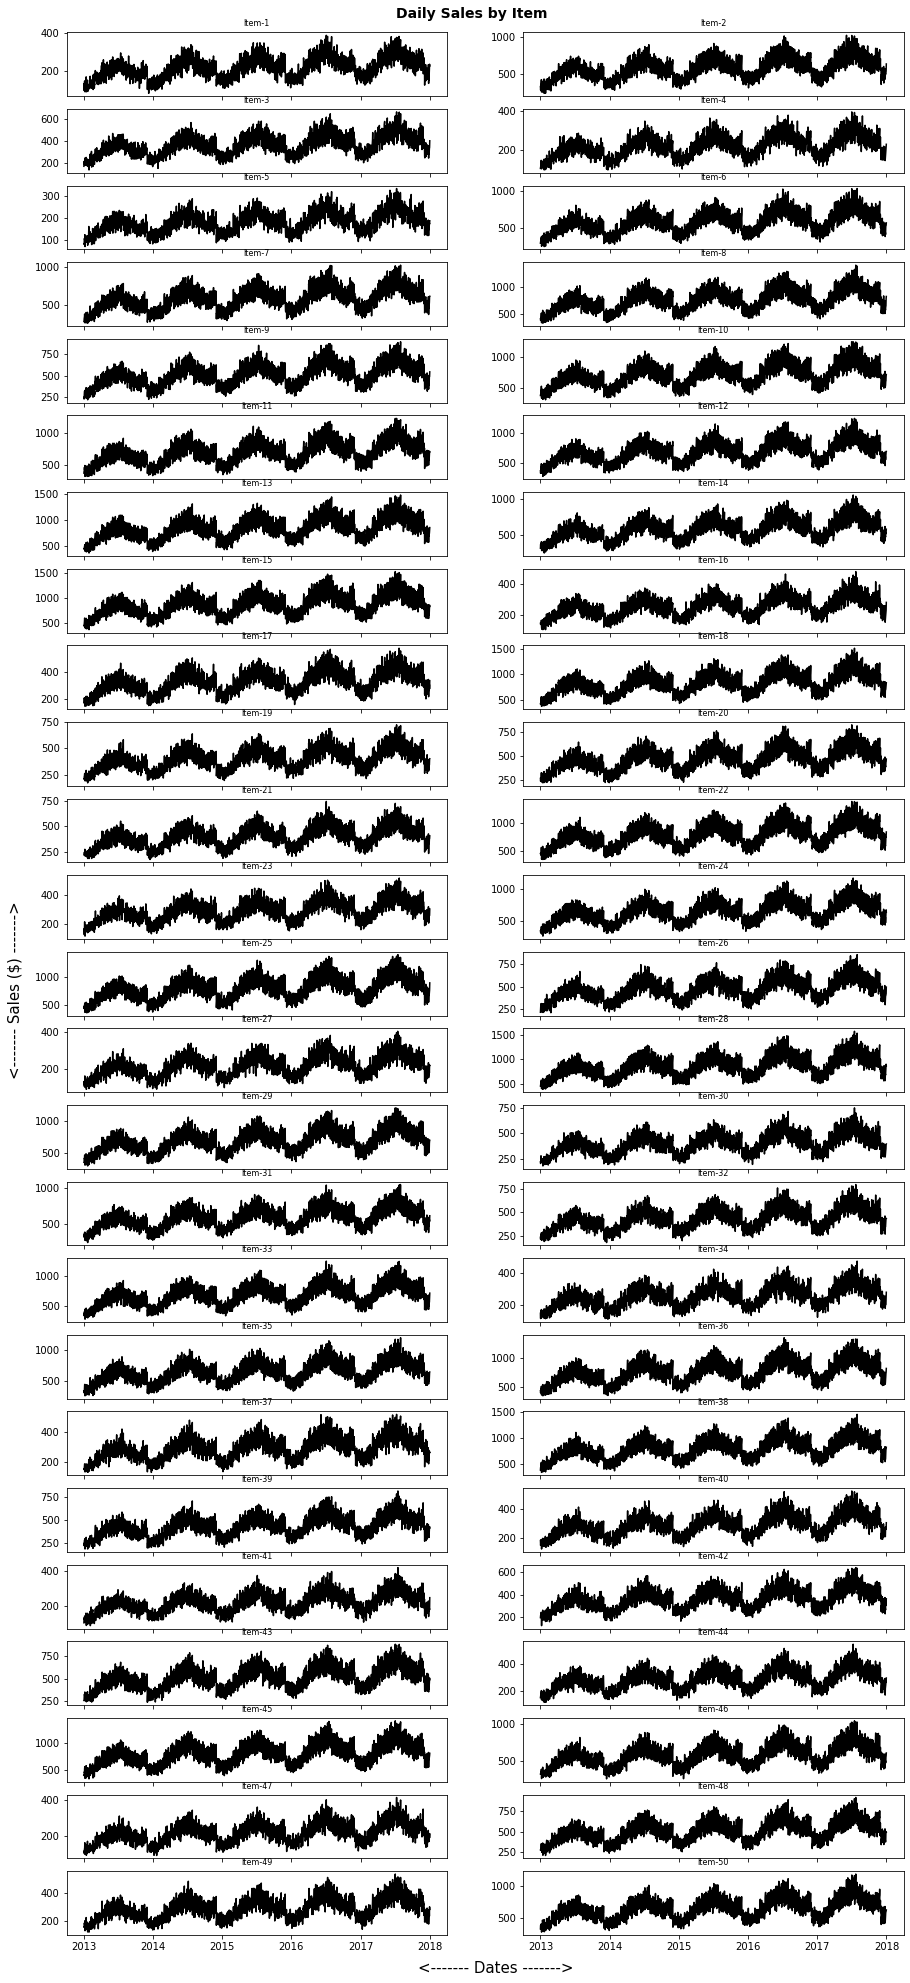

In [265]:
n_items = len(train.item.unique())

# Setting up parameters for the plot
n_cols = 2
n_rows = np.int(np.ceil(n_items/n_cols))
item_id = 1

fig, ax = plt.subplots(nrows = n_rows, ncols = n_cols, figsize = (15, 35), sharex = 'col')
plt.suptitle('Daily Sales by Item', x = 0.5, y = 0.89, size = 14, weight = 'bold')
for r in range(n_rows):
    for c in range(n_cols):
        foo = train.query('item == @item_id').groupby('date')['sales'].sum()
        ax[r, c].plot(foo.index, foo, color = 'black')
        ax[r, c].set_title('Item-%i' % item_id, fontdict = {'fontsize' : 8})
        item_id += 1

fig.text(0.07, 0.5, '<------- Sales ($) ------->', rotation = 'vertical', va = 'center', size = 15)
fig.text(0.45, 0.11, '<------- Dates ------->', size = 15)
plt.show()

#### Observations
<ol>
    <li>Daily sales (combined over all stores) exhibits a specific patterns:
        <ul>
            <li>Within a year, sales are cyclical, increasing month-on-month for about half the year and then decreasing month-on-month for the rest of the year.
            <li>This monthly pattern is repeated every year.
            <li>Year-on-year, the month-over-month sales (same month across different years) show an upward trend.
        </ul>
    <li>Individual store sales exhibit similar pattern for all stores which, in turn, is similar to the overall daily sales pattern.
    <li>Individual item sales exhibit similar pattern for all items which, in turn, is similar to the overall daily sales pattern.
</ol>

#### Investigation Stationarity of Time Series
<ul>
    <li>Since the total daily sales, individual store daily sales and individual item daily sales timeseries-es show similar pattern, investigating only one series, the total daily sales, will offer insights for all.
    <li>The total daily sales timeseries exhibits: 
        <ol>
            <li>significant day-to-day variance for all reasonable time windows
            <li>an upward trend in the month-over-month values
        <\ol>
    <li>The series is log transformed to dampen the variance and differenced to eliminate the trend. The plot of the resultant series and the augmented Dickey-Fuller test is used to confirm if the resultant series is stationary
           

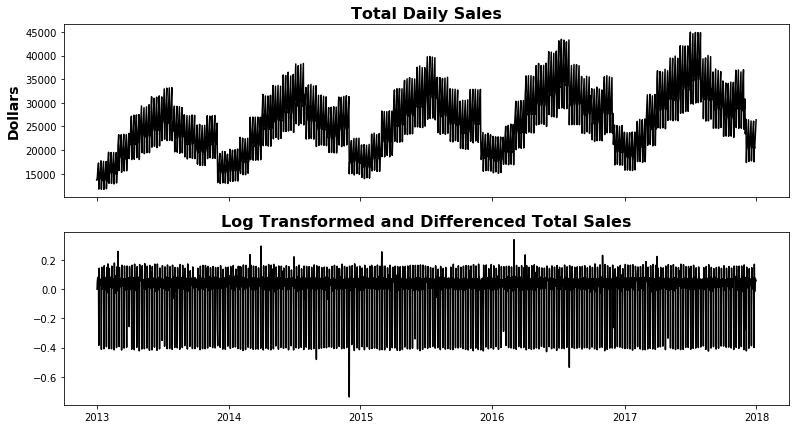

Results of the augmented Dickey-Fuller Test
ADF Statistic: -9.006513
p-value: 6.290411e-15
Critical Values:
	1%: -3.433990
	5%: -2.863148
	10%: -2.567626


In [311]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, sharex = True, figsize = (13, 7))

tot_sls = train.groupby(by = 'date')['sales'].sum()
ax1.plot(tot_sls.index, tot_sls, color = 'black')
ax1.set_title('Total Daily Sales', fontsize = 16, fontweight = 'bold')
ax1.set_ylabel('Dollars', fontsize = 14, fontweight = 'bold')



tot_sls_trans = np.log(tot_sls).diff()
ax2.plot(tot_sls_trans.index, tot_sls_trans, color = 'black')
ax2.set_title('Log Transformed and Differenced Total Sales', fontsize = 16, fontweight = 'bold')

plt.show()

result = adfuller(tot_sls_trans[1:])  # The first element of a diff series is a NaN
print('Results of the augmented Dickey-Fuller Test')
print('ADF Statistic: %f' % result[0])
print('p-value: %e' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %f' % (key, value))

/home/sanjeev/anaconda3/envs/timeseries/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


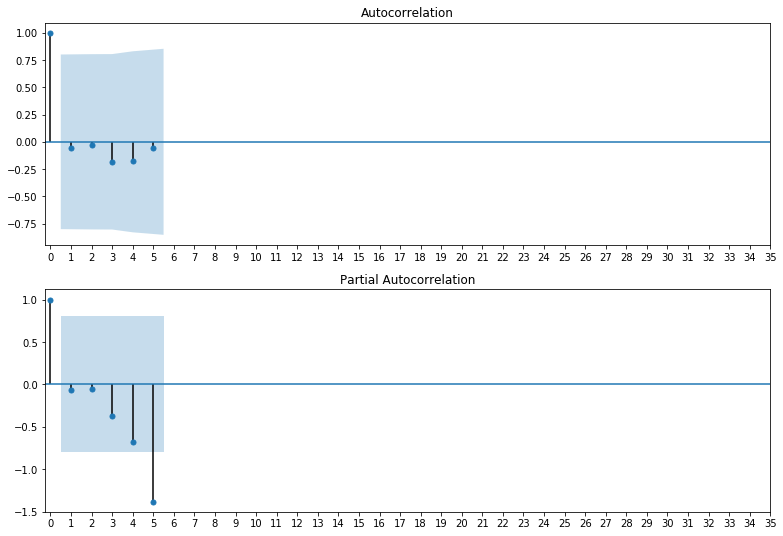

In [346]:
import statsmodels.graphics.tsaplots as t

fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (13, 9))
t.plot_acf(tot_sls_trans[1:], ax = ax1)
ax1.set_xticks(np.arange(0, 36))

t.plot_pacf(tot_sls_trans[1:], ax = ax2)
ax2.set_xticks(np.arange(0, 36))
plt.show()

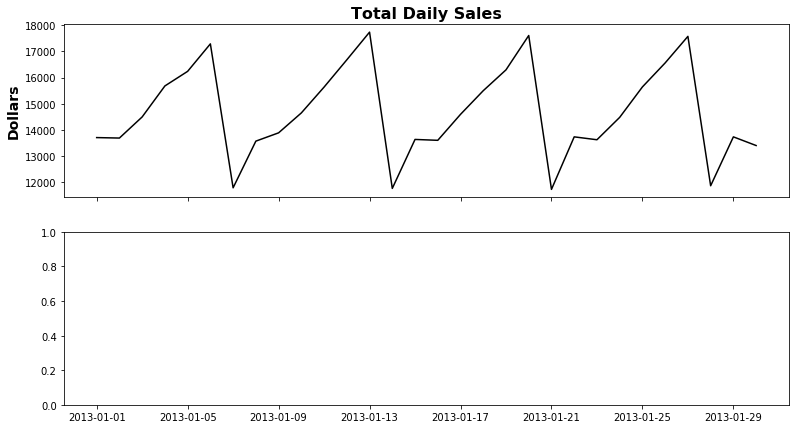

In [337]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, sharex = True, figsize = (13, 7))

tot_sls = train.groupby(by = 'date')['sales'].sum()
tot_sls = tot_sls[:30]
ax1.plot(tot_sls.index, tot_sls, color = 'black')
ax1.set_title('Total Daily Sales', fontsize = 16, fontweight = 'bold')
ax1.set_ylabel('Dollars', fontsize = 14, fontweight = 'bold')

'''tot_sls_trans = np.log(tot_sls).diff()
tot_sls_trans = tot_sls_trans[:21]
ax2.plot(tot_sls_trans.index, tot_sls_trans, color = 'black')
ax2.set_title('Log Transformed and Differenced Total Sales', fontsize = 16, fontweight = 'bold')'''

plt.show()